In [18]:
import numpy as np
from doctr.models import ocr_predictor
from doctr.io import DocumentFile
from PIL import Image

model = ocr_predictor("db_resnet50", "crnn_vgg16_bn", pretrained=True)
img = "images/indir.jpg"
single_img_doc = DocumentFile.from_images(img)

result = model(single_img_doc)
json_output = result.export()

In [19]:
whole_words = []
per_line_words = []
for block in json_output["pages"][0]["blocks"]:
    for line in block["lines"]:
        line_words = []
        for word in line["words"]:
            whole_words.append(word["value"])
            line_words.append(word["value"])
        per_line_words.append(line_words)

In [20]:
per_line_words

[['GUCLUYUMI'],
 ['çunku', 'zayrfuktarimi', 'biliyorum'],
 ['GUZELIM!'],
 ['çunku', 'kusurlarimin', 'rarkindayim'],
 ['BILGEYIM!'],
 ['çunku', 'natalarmdan', 'çok', 'sey', 'ogrendim'],
 ['ASIGIM!'],
 ['çunko', 'refreti', 'hissettim'],
 ['GULEBILIYORUMI'],
 ['çunku', 'uzuntu', 'nedir', 'iyi', 'biliyorum']]

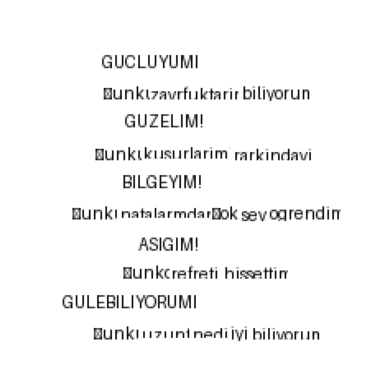

In [4]:
import matplotlib.pyplot as plt

synthetic_pages = result.synthesize()
plt.imshow(synthetic_pages[0])
plt.axis("off")
plt.show()

In [16]:
# Boyutlandırma (gerekliyse)
new_width = 400
new_height = 300
# img = synthetic_pages[0].resize((new_width, new_height))
img = np.resize(synthetic_pages[0], (new_width, new_height, 3))
img.shape

(400, 300, 3)

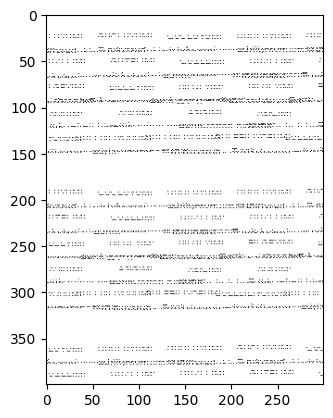

In [17]:
plt.imshow(img)

In [5]:
from doctr.io import DocumentFile
from doctr.models import kie_predictor

# Model
model = kie_predictor(
    det_arch="db_resnet50", reco_arch="crnn_vgg16_bn", pretrained=True
)
# PDF
doc = DocumentFile.from_images(img)
# Analyze
result = model(doc)

predictions = result.pages[0].predictions
for class_name in predictions.keys():
    list_predictions = predictions[class_name]
    for prediction in list_predictions:
        print(f"Prediction for {class_name}: {prediction}")

Prediction for words: Prediction(value='GUCLUYUMI', confidence=0.7, bounding_box=((0.248046875, 0.1142578125), (0.8134765625, 0.212890625)))
Prediction for words: Prediction(value='zayrfuktarimi', confidence=0.4, bounding_box=((0.37890625, 0.2041015625), (0.6171875, 0.24609375)))
Prediction for words: Prediction(value='çunku', confidence=0.77, bounding_box=((0.251953125, 0.2001953125), (0.3759765625, 0.2509765625)))
Prediction for words: Prediction(value='biliyorum', confidence=0.79, bounding_box=((0.626953125, 0.2021484375), (0.8095703125, 0.248046875)))
Prediction for words: Prediction(value='GUZELIM!', confidence=0.74, bounding_box=((0.310546875, 0.2763671875), (0.755859375, 0.3759765625)))
Prediction for words: Prediction(value='kusurlarimin', confidence=0.83, bounding_box=((0.361328125, 0.3662109375), (0.595703125, 0.404296875)))
Prediction for words: Prediction(value='çunku', confidence=0.85, bounding_box=((0.2314453125, 0.36328125), (0.353515625, 0.4150390625)))
Prediction for w

In [27]:
result

KIEDocument(
  (pages): [KIEPage(
    dimensions=(1235, 800)
    (predictions): {'words': [Prediction(value='Walter', confidence=0.99, bounding_box=((0.139691162109375, 0.0634765625), (0.3371826171875, 0.0986328125))), Prediction(value='J.Ong', confidence=0.98, bounding_box=((0.326629638671875, 0.056640625), (0.53316650390625, 0.111328125))), Prediction(value='Sozluve', confidence=0.87, bounding_box=((0.13818359375, 0.1123046875), (0.438189697265625, 0.1650390625))), Prediction(value='Yazili', confidence=0.94, bounding_box=((0.44271240234375, 0.1142578125), (0.640203857421875, 0.16015625))), Prediction(value='Kultur', confidence=1.0, bounding_box=((0.646234130859375, 0.1162109375), (0.8678466796875, 0.1591796875))), Prediction(value='SOZON', confidence=0.89, bounding_box=((0.145721435546875, 0.1787109375), (0.2587890625, 0.2080078125))), Prediction(value='TEKNOLOJILESMESI', confidence=0.55, bounding_box=((0.26180419921875, 0.181640625), (0.558795166015625, 0.208984375))), Prediction(va

In [21]:
import numpy as np
from doctr.models import ocr_predictor
from doctr.io import DocumentFile
from PIL import Image

model = ocr_predictor("db_resnet50", "crnn_vgg16_bn", pretrained=True)
img = "images/indir.jpg"
doc = DocumentFile.from_pdf("images\samplePDF.pdf")

result = model(doc)
json_output = result.export()

In [22]:
result

Document(
  (pages): [Page(
    dimensions=(1191, 1684)
    (blocks): [
      Block(
        (lines): [Line(
          (words): [
            Word(value='Object', confidence=1.0),
            Word(value='Oriented', confidence=1.0),
            Word(value='Programming', confidence=0.5),
          ]
        )]
        (artefacts): []
      ),
      Block(
        (lines): [Line(
          (words): [
            Word(value='Introduction', confidence=0.72),
            Word(value='to', confidence=1.0),
            Word(value='Java', confidence=1.0),
            Word(value='&', confidence=1.0),
          ]
        )]
        (artefacts): []
      ),
      Block(
        (lines): [Line(
          (words): [
            Word(value='Introduction', confidence=0.97),
            Word(value='to', confidence=1.0),
            Word(value='Object', confidence=0.99),
            Word(value='Orientation', confidence=0.96),
          ]
        )]
        (artefacts): []
      ),
      Block(
        (l

In [4]:
import numpy as np

arr = np.arange(1, 16)
arr[3:10:1]

array([ 4,  5,  6,  7,  8,  9, 10])

In [2]:
arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])